# SKLearn : Inspection

#### Decision Boundary

Explore the decision boundary of the DecisionTreeClassifier 

https://scikit-learn.org/stable/visualizations.html#visualizations

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib 
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
%matplotlib inline

### Generate Classification Data

In [5]:
X, y = make_classification(
    n_samples=2000,
    n_features=25,
    n_informative=15,
    n_redundant=5,
    n_clusters_per_class=2,
    class_sep=2,
    shift=0.2,
    flip_y=0.02,
    random_state=None
)

In [6]:
print( np.bincount(y) )

[ 998 1002]


In [7]:
print( [round(x,2) for x in np.bincount(y)/len(y)] )

[0.5, 0.5]


### Plot

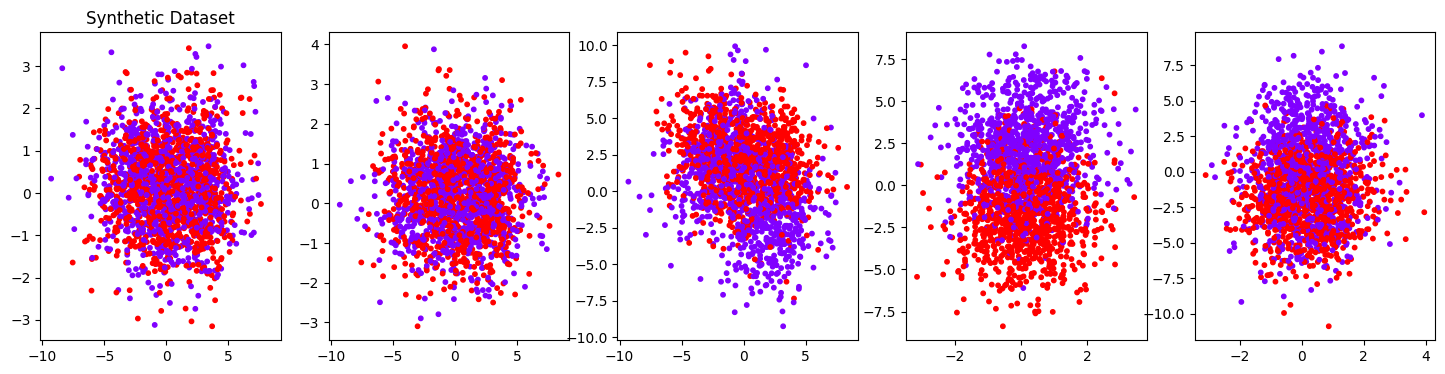

In [8]:
fig, ax = plt.subplots(1,5, figsize=(18,4))

ax[0].scatter(X[:,0], X[:,1], s=10, c=y, cmap='rainbow')
ax[1].scatter(X[:,0], X[:,2], s=10, c=y, cmap='rainbow')
ax[2].scatter(X[:,0], X[:,3], s=10, c=y, cmap='rainbow')
ax[3].scatter(X[:,1], X[:,4], s=10, c=y, cmap='rainbow')
ax[4].scatter(X[:,2], X[:,6], s=10, c=y, cmap='rainbow')

ax[0].set_title("Synthetic Dataset")

plt.show()

### Model

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

In [10]:
n = X.shape[1]

XX = X[:, np.random.choice(n, 2)]

clf = DecisionTreeClassifier()
clf.fit(XX, y)

DecisionTreeClassifier()

### Decision Boundary 

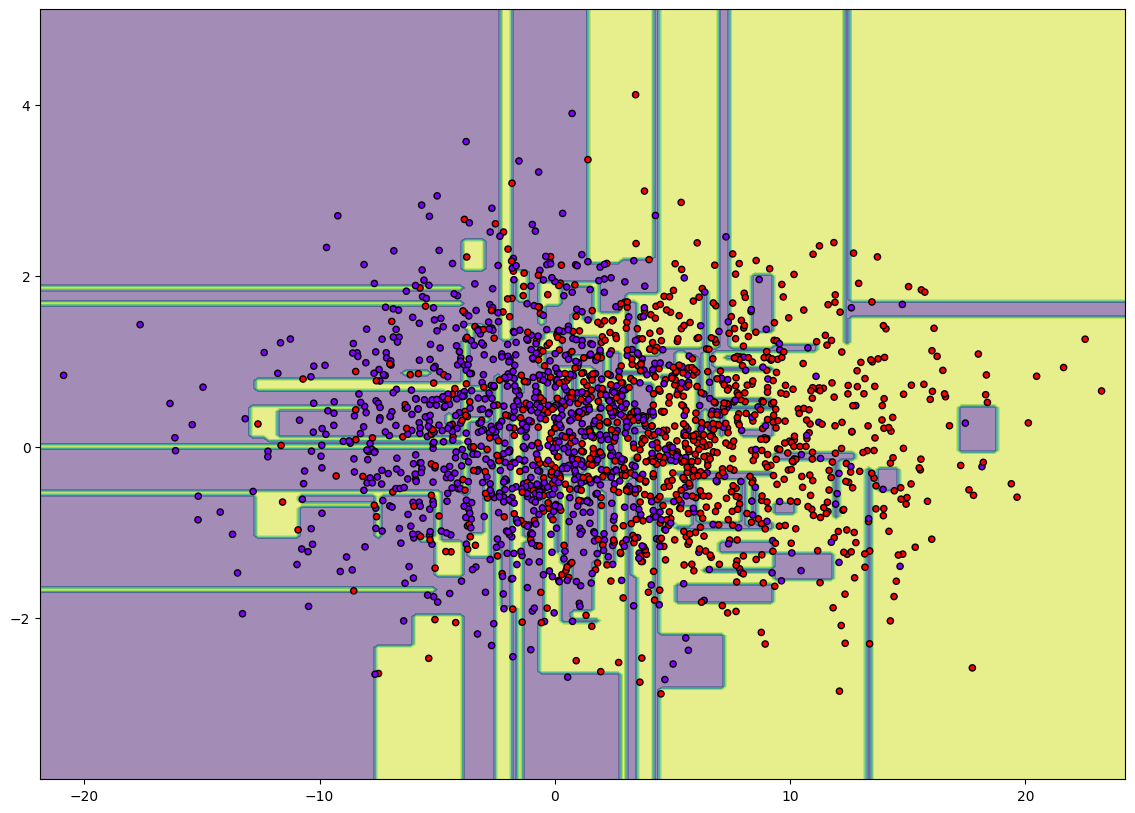

In [11]:
fig, ax = plt.subplots(1,1,figsize=(14,10) )

disp = DecisionBoundaryDisplay.from_estimator(
    clf, 
    XX, 
    plot_method='contourf',
    #plot_method="pcolormesh", shading="auto",
    response_method="predict",
    grid_resolution=200,
    xlabel=None, 
    ylabel=None,
    alpha=0.5,
    ax=ax
)

disp.ax_.scatter(XX[:,0], XX[:,1], s=20, c=y, cmap='rainbow', edgecolor="k")
plt.show()